# COMP24111 - Exercise 2: News Article Classification

## 1. Task description

You will work on a news article classification task.
The provided dataset includes a total of 800 articles taken from Reuters newswire.
They belong to 4 classes: "earn" (1), "crude" (2), "trade" (3) and "interest" (4).
There are 200 articles per class.
Each article is characterised by word occurrences.
The list of used words is called a vocabulary.
In our dataset, the vocabulary includes a total of 6428 words. 

## 2. Preparation

First we need to import the data.
Run the below cell to load the data using NumPy.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse

data, labels, class_names, vocabulary = np.load("ReutersNews_4Classes_sparse.npy", allow_pickle=True)

### A Note on Sparsity

Most documents only contain a small subset of the vocabulary, resulting in a very sparse data matrix.
To take advantage of the sparsity, in this exercise `data` is represented as a `scipy.sparse.csr_matrix`, which can store sparse matrices efficiently while still allowing efficient row-based indexing.
You can learn more about `csr_matrix` and other ways of dealing with sparse matrices at https://docs.scipy.org/doc/scipy/reference/sparse.html.

Note, however, that `data` is **not** a normal NumPy array.
While most operations will be the same as with a normal dense array, **you cannot use a sparse matrix to index another matrix**.
If you need to do this, either first convert the matrix to a NumPy array with the `toarray()` method, or use methods specifically designed to work with sparse matrices.

In [4]:
print(data[41]) # Sparse, will print the non-zero indices and their values.
print(data[41].toarray()) # Convert back to a NumPy array. Note that the result is a (1, 6428) matrix, not a vector.
# print(vocabulary[data[41,:] > 0]) # Can't index vocabulary with a sparse matrix.
rows, columns, values = scipy.sparse.find(data[41,:]) # Find the non-zero entries in the 42nd document.
print(vocabulary[columns]) # Prints the words present in the 42nd document.

  (0, 2)	1
  (0, 3)	3
  (0, 5)	1
  (0, 8)	1
  (0, 10)	1
  (0, 11)	1
  (0, 12)	1
  (0, 13)	1
  (0, 21)	2
  (0, 24)	1
  (0, 105)	1
  (0, 127)	1
  (0, 227)	1
  (0, 275)	1
  (0, 334)	2
  (0, 341)	1
  (0, 348)	1
  (0, 359)	1
  (0, 411)	1
  (0, 426)	1
  (0, 1428)	1
  (0, 2058)	1
  (0, 5555)	1
[[0 0 1 ... 0 0 0]]
['share' 'split' 'say' 'two-for-one' 'shareholder' 'annual' 'meeting'
 'reuter' 'ct' 'note' 'company' 'pay' 'subject' 'increase' 'stock'
 'dividend' 'april' 'northern' 'declare' 'approval' 'telecom' 'post-split'
 'nt']


To see the full vocabulary, you can run

In [3]:
print(", ".join(vocabulary))

island, telephone, share, split, approve, say, previously, announce, two-for-one, common, shareholder, annual, meeting, reuter, year, net, shr, loss, nil, vs, profit, ct, rev, mln, note, current, include, charge, discontinue, operation, dlr, ec, state, tax, majority, european, community, member, strong, reservation, import, domestically-produced, oil, fat, propose, commission, senior, diplomat, special, committee, agricultural, expert, voice, objection, measure, prepare, ground, farm, begin, monday, add, france, italy, indicate, support, proposal, lead, initially, tonne, 1987/88, price, round, complete, sale, french, unit, business, compagnie, francaise, group, investor, employee, minnesota, disclose, term, deal, plan, asset, electronic, shoe, town, end, jan, respectively, december, wisconsin, fwb, buy, bank, corp, acquire, bancshare, cash, acquisition, hold, company, total, billion, purchase, time, earning, office, paul, area, american, product, 3rd, qtr, period, feb, mth, avg, 4th, s

You can see how many times article $i$ contains word $j$ using

In [5]:
i, j = 40, 2
print(data[i,j])

4


You can see which class the $i$th article belongs to using

In [6]:
print(labels[i])

0


For instance, by running

In [7]:
print("Occurrences:", data[0,10])
print("Class:", class_names[labels[0]])
print("Word:", vocabulary[10])

Occurrences: 2
Class: earn
Word: shareholder


you can see that the 11th word appears twice in the first document, the first document belongs to the class "earn", and the 11th word is "shareholder".

The following function randomly selects a subset of the data.

In [3]:
def sample_indices(labels, *num_per_class):
    """
    Returns randomly selected indices. It will return the specified number of indices for each class.
    """
    indices = []
    for cls, num in enumerate(num_per_class):
        cls_indices = np.where(labels == cls)[0]
        indices.extend(np.random.choice(cls_indices, size=num, replace=False))
    return np.array(indices)

For instance, to get one sample from the first class, two from the second, three from the third, and four from the fourth, you can run:

In [12]:
indices = sample_indices(labels, 1, 2, 3, 4)
print("Returned indices:", indices)
print("Samples:", data[indices])
print("Corresponding classes:", labels[indices])

Returned indices: [ 76 245 257 519 595 473 656 610 752 740]
Samples:   (0, 6089)	1
  (0, 4700)	2
  (0, 4699)	2
  (0, 688)	1
  (0, 622)	2
  (0, 411)	1
  (0, 410)	2
  (0, 365)	2
  (0, 349)	1
  (0, 346)	1
  (0, 341)	1
  (0, 261)	1
  (0, 255)	1
  (0, 157)	1
  (0, 21)	1
  (0, 13)	1
  (0, 11)	1
  (0, 5)	1
  (0, 2)	1
  (1, 4270)	1
  (1, 3692)	1
  (1, 3689)	1
  (1, 3681)	1
  (1, 3674)	1
  (1, 3672)	1
  :	:
  (8, 814)	1
  (8, 728)	1
  (8, 340)	2
  (8, 332)	2
  (8, 320)	2
  (8, 252)	1
  (8, 98)	3
  (8, 75)	1
  (8, 13)	1
  (8, 5)	1
  (9, 6394)	1
  (9, 5087)	1
  (9, 3276)	1
  (9, 3211)	1
  (9, 3165)	1
  (9, 2565)	1
  (9, 984)	2
  (9, 376)	1
  (9, 340)	1
  (9, 332)	2
  (9, 112)	1
  (9, 98)	4
  (9, 75)	2
  (9, 13)	1
  (9, 5)	1
Corresponding classes: [0 1 1 2 2 2 3 3 3 3]


## 3. k-NN implementation

Now, you will need to implement a k-NN classifier by filling the code below.
This function should support two types of distance measures: Euclidean distance and cosine distance.
It should take a set of training samples, a user-specified neighour number, a distance option, and features of a set of testing samples as the input.
It should return the predicted classes for the input set of testing samples.

In order to complete this function, you will need the `sklearn.metrics.pairwise_distances` function which can handle sparse matrices, below imported as `cdist` to follow SciPy conventions (not to be confused with the `pdist` function).
You should also research NumPy functions relating to sorting.

**Your implementation must NOT make use of Python loops over individual samples**.
You should use functions that operate on whole matrices, as this will be much faster than looping in Python.

In [15]:
import scipy.stats
from sklearn.metrics import pairwise_distances as cdist

def knn_classify(test_samples, training_data, training_labels, metric="euclidean", k=1):
    """
    Performs k-nearest neighbour classification on the provided samples,
    given training data and the corresponding labels.
    
    test_samples: An m x d matrix of m samples to classify, each with d features.
    training_data: An n x d matrix consisting of n training samples, each with d features.
    training_labels: A vector of size n, where training_labels[i] is the label of training_data[i].
    metric: The metric to use for calculating distances between samples.
    k: The number of nearest neighbours to use for classification.
    
    Returns: A vector of size m, where out[i] is the predicted class of test_samples[i].
    """
    # Calculate an m x n distance matrix.
    pairwise_distance = cdist(test_samples, training_data, metric = metric)
    
    # Find the k nearest neighbours of each samples as an m x k matrix of indices.
    nearest_neighbours = np.argsort(pairwise_distance)
    nearest_neighbours = nearest_neighbours[:,:k]
    
    # Look up the classes corresponding to each index.
    nearest_labels = training_labels[nearest_neighbours]
    
    # Return the most frequent class on each row.
    # Note: Ensure that the returned vector does not contain any empty dimensions.
    # You may find the squeeze method useful here.
    return np.squeeze(scipy.stats.mode(nearest_labels, axis = 1)[0])

## 4. Experiments

Use your k-NN function to perform the following experiments.

### Experiment 1

Randomly select 80 articles per class for training, and use the remaining articles for testing.
Select an appropriate neighbour number.
Train your k-NN classifier using the Euclidean distance and test it.
Repeat this process 20 times (trials).
Calculate the mean and standard deviation of the testing accuracies.

In [73]:
# Your code goes here

#Array to store the accuracy
accuracy_array = []

#Repeat for 20 trials
for i in range (20):
    
    #Randomly selected 80 articles for training
    training_indices = sample_indices(labels, 80, 80, 80, 80)
    testing_indices = np.delete(np.arange(800), training_indices)
    
    #Retrieve the data from the articles
    training_data = data[training_indices]
    training_labels = labels[training_indices]
    testing_data = data[testing_indices]
    testing_labels = labels[testing_indices]
    
    #Classify the labels using the above classifier and euclidean distance
    classified_labels = knn_classify(testing_data, training_data, training_labels, "euclidean", k=1)
    
    #Find the number of correctly classified labels
    correctly_classified = 0
    for j in range(480):
        if(classified_labels[j] == testing_labels[j]):
            correctly_classified += 1;
            
    #Calculate the accuracy
    accuracy = (correctly_classified / 480) * 100
    accuracy_array.append(accuracy)
    print("Accuracy for trial", i + 1, " = ",accuracy)
    
#Print the mean accuracy and the standard deviation for the whole test
mean = np.mean(accuracy_array)
print("Mean accuracy = ", mean)
standard_deviation = np.std(accuracy_array)
print("Standard deviation = ", standard_deviation)

Accuracy for trial 1  =  91.66666666666666
Accuracy for trial 2  =  91.45833333333333
Accuracy for trial 3  =  90.0
Accuracy for trial 4  =  89.375
Accuracy for trial 5  =  88.75
Accuracy for trial 6  =  89.79166666666667
Accuracy for trial 7  =  88.54166666666666
Accuracy for trial 8  =  89.79166666666667
Accuracy for trial 9  =  88.95833333333333
Accuracy for trial 10  =  88.125
Accuracy for trial 11  =  90.83333333333333
Accuracy for trial 12  =  88.75
Accuracy for trial 13  =  86.04166666666667
Accuracy for trial 14  =  89.79166666666667
Accuracy for trial 15  =  88.75
Accuracy for trial 16  =  88.75
Accuracy for trial 17  =  90.41666666666667
Accuracy for trial 18  =  87.91666666666667
Accuracy for trial 19  =  88.54166666666666
Accuracy for trial 20  =  86.04166666666667
Mean accuracy =  89.11458333333334
Standard deviation =  1.438669512180533


Use the same neighbour number, but use the cosine distance instead of the Euclidean distance.
Repeat the same experiment.

In [74]:
# Your code goes here

#Array to store the accuracy
accuracy_array = []

#Repeat for 20 trials
for i in range (20):
    
    #Randomly selected 80 articles for training
    training_indices = sample_indices(labels, 80, 80, 80, 80)
    testing_indices = np.delete(np.arange(800), training_indices)
    
    #Retrieve the data from the articles
    training_data = data[training_indices]
    training_labels = labels[training_indices]
    testing_data = data[testing_indices]
    testing_labels = labels[testing_indices]
    
    #Classify the labels using the above classifier and cosine distance
    classified_labels = knn_classify(testing_data, training_data, training_labels, "cosine", k=1)
    
    #Find the number of correctly classified labels
    correctly_classified = 0
    for j in range(480):
        if(classified_labels[j] == testing_labels[j]):
            correctly_classified += 1;
            
    #Calculate the accuracy
    accuracy = (correctly_classified / 480) * 100
    accuracy_array.append(accuracy)
    print("Accuracy for trial", i + 1, " = ",accuracy)
    
#Print the mean accuracy and the standard deviation for the whole test
mean = np.mean(accuracy_array)
print("Mean accuracy = ", mean)
standard_deviation = np.std(accuracy_array)
print("Standard deviation = ", standard_deviation)

Accuracy for trial 1  =  97.5
Accuracy for trial 2  =  95.41666666666667
Accuracy for trial 3  =  96.45833333333333
Accuracy for trial 4  =  96.66666666666667
Accuracy for trial 5  =  96.25
Accuracy for trial 6  =  95.83333333333334
Accuracy for trial 7  =  96.875
Accuracy for trial 8  =  95.83333333333334
Accuracy for trial 9  =  96.875
Accuracy for trial 10  =  97.08333333333333
Accuracy for trial 11  =  96.66666666666667
Accuracy for trial 12  =  97.08333333333333
Accuracy for trial 13  =  96.875
Accuracy for trial 14  =  97.5
Accuracy for trial 15  =  95.20833333333333
Accuracy for trial 16  =  96.04166666666667
Accuracy for trial 17  =  96.45833333333333
Accuracy for trial 18  =  95.20833333333333
Accuracy for trial 19  =  96.25
Accuracy for trial 20  =  96.04166666666667
Mean accuracy =  96.40625
Standard deviation =  0.6682111016654001


Which distance measure gives better performance?

### Experiment 2

Using the distance measure that you found performs better, repeat the same experiment, varying the neighbour number $k$ from 1 to 50.
This time, record the average training errors and standard deviation over 20 trials, for different values of $k$.
Do the same for testing errors.

In [82]:
# Your code goes here

#Arrays to store accuracy and standard deviation values for all k values
all_training_accuracy = []
all_training_standard_deviation = []
all_testing_accuracy = []
all_testing_standard_deviation = []

#Repeat for k values from 1 to 50
for k in range (1, 51):
    
    #Array to store the accuracy for training and testing
    training_accuracy_array = []
    testing_accuracy_array = []

    #Repeat for 20 trials
    for i in range (20):
    
        #Randomly selected 80 articles for training
        training_indices = sample_indices(labels, 80, 80, 80, 80)
        testing_indices = np.delete(np.arange(800), training_indices)
    
        #Retrieve the data from the articles
        training_data = data[training_indices]
        training_labels = labels[training_indices]
        testing_data = data[testing_indices]
        testing_labels = labels[testing_indices]
    
        #Classify the labels using the above classifier and cosine distance
        classified_training = knn_classify(training_data = training_data, training_labels = training_labels, test_samples = training_data, metric = "cosine", k = k)
        classified_testing = knn_classify(training_data = training_data, training_labels = training_labels, test_samples = testing_data, metric = "cosine", k = k)
        
        #Find the number of correctly classified labels for training
        correctly_classified_training = np.sum(training_labels == classified_training)
        training_accuracy_array.append((correctly_classified_training / 320) * 100)
        
        #Find the number of correctly classified labels for testing
        correctly_classified_testing = np.sum(testing_labels == classified_testing)
        testing_accuracy_array.append((correctly_classified_testing / 480) * 100)

    
    #Print the mean accuracy and the standard deviation for the whole test
    training_mean = np.mean(training_accuracy_array)
    print("k", k, "training accuracy = ", training_mean)
    all_training_accuracy.append(training_mean)
    
    training_standard_deviation = np.std(training_accuracy_array)
    print("k", k, "training standard deviation = ", training_standard_deviation)
    all_training_standard_deviation.append(training_standard_deviation)
    
    testing_mean = np.mean(testing_accuracy_array)
    print("k", k, "testing accuracy = ", testing_mean)
    all_testing_accuracy.append(testing_mean)
    
    testing_standard_deviation = np.std(testing_accuracy_array)
    print("k", k, "testing standard deviation = ", testing_standard_deviation)
    all_testing_standard_deviation.append(testing_standard_deviation)
    print("")

k 1 training accuracy =  100.0
k 1 training standard deviation =  0.0
k 1 testing accuracy =  96.38541666666666
k 1 testing standard deviation =  0.9953777723669648

k 2 training accuracy =  98.375
k 2 training standard deviation =  0.57282196186948
k 2 testing accuracy =  96.00000000000001
k 2 testing standard deviation =  0.9939050368230455

k 3 training accuracy =  98.125
k 3 training standard deviation =  0.6480137922914913
k 3 testing accuracy =  96.29166666666666
k 3 testing standard deviation =  0.6059599821770403

k 4 training accuracy =  97.703125
k 4 training standard deviation =  1.1620420805095657
k 4 testing accuracy =  95.82291666666666
k 4 testing standard deviation =  0.6603706608581456

k 5 training accuracy =  97.546875
k 5 training standard deviation =  0.650082626959835
k 5 testing accuracy =  95.96875
k 5 testing standard deviation =  0.7403165379679771

k 6 training accuracy =  97.25
k 6 training standard deviation =  0.7818747501998002
k 6 testing accuracy =  95.

k 46 training accuracy =  93.6875
k 46 training standard deviation =  0.6959705453537527
k 46 testing accuracy =  93.63541666666667
k 46 testing standard deviation =  0.7668110144908221

k 47 training accuracy =  93.859375
k 47 training standard deviation =  1.195184837953946
k 47 testing accuracy =  93.42708333333334
k 47 testing standard deviation =  0.837165667097417

k 48 training accuracy =  93.90625
k 48 training standard deviation =  0.9401005597807077
k 48 testing accuracy =  93.75
k 48 testing standard deviation =  0.8333333333333327

k 49 training accuracy =  94.15625
k 49 training standard deviation =  0.7661031670082039
k 49 testing accuracy =  93.19791666666667
k 49 testing standard deviation =  0.6759606076211498

k 50 training accuracy =  93.828125
k 50 training standard deviation =  1.0216169398923454
k 50 testing accuracy =  93.28125000000001
k 50 testing standard deviation =  0.674675204779634



Produce an error bar plot showing the training accuracy for each $k$ here:

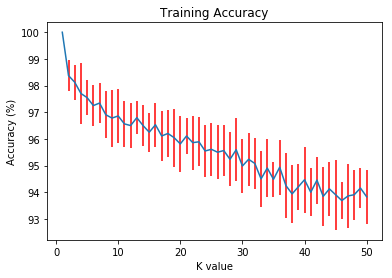

In [83]:
# Your code goes here
from matplotlib import pyplot as plt

plt.errorbar(np.arange(1,51), all_training_accuracy, yerr = all_training_standard_deviation, ecolor='r')
plt.xlabel('K value')
plt.ylabel('Accuracy (%)')
plt.title('Training Accuracy')
plt.show()

Produce your testing error bar plot here:

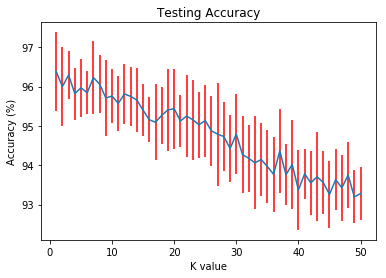

In [84]:
# Your code goes here

plt.errorbar(np.arange(1,51), all_testing_accuracy, yerr = all_testing_standard_deviation, ecolor='r')
plt.xlabel('K value')
plt.ylabel('Accuracy (%)')
plt.title('Testing Accuracy')
plt.show()

**Remember that all graphs should have axis labels and a title.**

Now, answer a few questions according to what you have observed.

Q1. What is the training accuracy obtained when $k=1$? Explain it.

Q2. Do the testing and training accuracies differ, and why?

Q3. How do the accuracies change as $k$ gets bigger, and why?

### Experiment 3

Compare three 5-NN classifiers using cosine distance.
First, randomly select 100 articles per class and keep these as your testing samples.

In [255]:
ex3_training_indices = []
ex3_testing_indices = sample_indices(labels, 100, 100, 100, 100)
ex3_training_indices = np.delete(np.arange(800), ex3_testing_indices)

ex3_training_data = data[ex3_training_indices]
ex3_training_labels = labels[ex3_training_indices]
ex3_testing_data = data[ex3_testing_indices]
ex3_testing_labels = labels[ex3_testing_indices]

Then do the following:

(1) Train the first classifier using all the remaining articles.
Compute the confusion matrix for the 4 classes using the testing samples.

In [248]:
#Create the structure for the confusion matrix
classes = np.zeros(shape = (4,4))

'''
            TP  FN  FP  TN
Class 1
Class 2
Class 3
Class 4

'''

#Logic for constructing the confusion matrix
def confusion_matrix(class_number, original_test, classified_test):
    for i in range(len(classified_test)):
        
        if(classified_test[i] == class_number):
            if(classified_test[i] == original_test[i]):
                classes[class_number][0] += 1;
            else:
                classes[class_number][1] += 1;
        else:
            if(classified_test[i] == original_test[i]):
                classes[class_number][3] += 1;
            else:
                classes[class_number][2] += 1;
            
#Construct the confusion matrix
def construct_confusion_matrix(original_test, classified_test):
    for i in range (4):
        confusion_matrix(i, original_test, classified_test)
              
        
#Classify the labels using the above classifier and cosine distance
ex3_classified_test = knn_classify(training_data = ex3_training_data, training_labels = ex3_training_labels, test_samples = ex3_testing_data, metric = "cosine", k = 5)
        
#Use the classified tests to create a confusion matrix
construct_confusion_matrix(ex3_testing_labels, ex3_classified_test)
print(classes)

[[ 97.   6.  11. 286.]
 [ 96.   0.  17. 287.]
 [ 94.   9.   8. 289.]
 [ 96.   2.  15. 287.]]


(2) Randomly remove 95 training articles from class 2.
Train the second classifier using the reduced training samples.
Compute the confusion matrix for the 4 classes using the testing samples.

In [279]:
#Remove 95 training articles from class 2
indices_to_remove_class2 = np.random.choice(ex3_training_indices[100:200], 95, replace = False)
new_training_indices = np.setdiff1d(ex3_training_indices, indices_to_remove_class2)
new_training_data = data[new_training_indices]
new_training_labels = labels[new_training_indices]

#Create the structure for the confusion matrix
classes = np.zeros(shape = (4,4))

#Classify again using the new training samples and construct the new confusion matrix
classified_test = knn_classify(training_data = new_training_data, training_labels = new_training_labels, test_samples = testing_data, metric = "cosine", k = 5)
construct_confusion_matrix(testing_labels, classified_test)
print(classes)

[[ 98.  39.  60. 203.]
 [  9.   0.  99. 292.]
 [ 96.  40.  59. 205.]
 [ 98.  20.  79. 203.]]


(3) Redo (2), but randomly remove 95 training articles from *all* the classes.
Train the third classifier using the new training data.
Compute the confusion matrix for the 4 classes using the testing samples.

In [278]:
#Remove 95 training articles from each of the remaining classes
indices_to_remove_class1 = np.random.choice(ex3_training_indices[0:100], 95, replace = False)
new_training_indices = np.setdiff1d(ex3_training_indices, indices_to_remove_class1)

indices_to_remove_class2 = np.random.choice(ex3_training_indices[100:200], 95, replace = False)
new_training_indices = np.setdiff1d(new_training_indices, indices_to_remove_class2)

indices_to_remove_class3 = np.random.choice(ex3_training_indices[200:300], 95, replace = False)
new_training_indices = np.setdiff1d(new_training_indices, indices_to_remove_class3)

indices_to_remove_class4 = np.random.choice(ex3_training_indices[300:400], 95, replace = False)
new_training_indices = np.setdiff1d(new_training_indices, indices_to_remove_class4)

#Create the structure for the confusion matrix
classes = np.zeros(shape = (4,4))

new_training_data = data[new_training_indices]
new_training_labels = labels[new_training_indices]

#Classify again using the new training samples and construct the new confusion matrix
classified_test = knn_classify(training_data = new_training_data, training_labels = new_training_labels, test_samples = testing_data, metric = "cosine", k = 5)
construct_confusion_matrix(testing_labels, classified_test)
print(classes)

[[ 91.  18.  35. 256.]
 [ 86.  19.  34. 261.]
 [ 86.   9.  44. 261.]
 [ 84.   7.  46. 263.]]


Repeat the whole thing a few times.
Which of the three classifiers performs the worst?
Try to analyse why this might be.

## 5. Deliverables and Marking

By the deadline, you should submit one single Jupyter file using GitLab.
Please find the coursework submission instruction from the following link:
https://wiki.cs.manchester.ac.uk/index.php/UGHandbook19:Coursework

This exercise is worth 15 marks — marks will be allocated roughly on the basis of:
* rigorous experimentation,
* knowledge displayed when talking to the TA,
* problem solving skill,
* self-learning ability,
* how informative and well presented your graphs are,
* language and ease of reading.

You must be able to explain any code you've written in order to get full marks. During the marking session we will ask you to run all cells in your Jupyter file, so ensure that the file is runnable using the "Restart Kernel and Run All Cells" menu option.

The lab is marked out of 15:

|                          |         |
|:------------------------ |--------:|
| k-NN Implementation      | 3 marks |
| Experiment 1             | 4 marks |
| Experiment 2             | 4 marks |
| Experiment 3             | 4 marks |